In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary

In [2]:
trainingDataSet = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testingDataSet = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 107160799.65it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 82405233.89it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27939157.44it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14153438.91it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [3]:
# Set different batch sizes for each of the 5 different models
batchSizes = [5, 25, 50, 100, 200]

train_loaders = [torch.utils.data.DataLoader(trainingDataSet, batch_size=batch_size, shuffle=True) for batch_size in batchSizes]
test_loaders = [torch.utils.data.DataLoader(testingDataSet, batch_size=batch_size, shuffle=True) for batch_size in batchSizes]


In [4]:
#  16640 Parameters
class Model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

# 16640 Parameters
class Model2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

# 16640 Parameters
class Model3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

# 16640 Parameters
class Model4 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

# 16640 Parameters
class Model5 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [8]:
models = [Model1(), Model2(), Model3(), Model4(), Model5()]
optimizers = [optim.SGD(model.parameters(), lr=0.001) for model in models]
lossFunc = nn.CrossEntropyLoss()
for model in models:
    summary(model, (28 * 28,))




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          15,700
            Linear-2                   [-1, 30]             630
            Linear-3                   [-1, 10]             310
Total params: 16,640
Trainable params: 16,640
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.07
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          15,700
            Linear-2                   [-1, 30]             630
            Linear-3                   [-1, 10]             310
Total params: 16,640
Trainable params: 16,6

In [9]:


EPOCHS = 50

for epoch in range(EPOCHS):
    print(f"Epoch: {epoch + 1}")

    for model, optimizer, loader in zip(models, optimizers, train_loaders):
        model.train()

        for inputImages, actual in loader:
            optimizer.zero_grad()
            output = model(inputImages.view(-1, 784))
            cost = lossFunc(output, actual)
            cost.backward()
            optimizer.step()


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50


In [10]:
def calculate_metrics(model, loader, loss_func):
    correct = 0
    total = 0
    cost_total = 0
    cost_counter = 0

    with torch.no_grad():
        for batch in loader:
            input_images, actual = batch
            output = model(input_images.view(-1, 784))
            cost = loss_func(output, actual)
            cost_total += cost.detach().numpy()
            cost_counter += 1

            for i, output_tensor in enumerate(output):
                if torch.argmax(output_tensor) == actual[i]:
                    correct += 1
                total += 1

    return cost_total / cost_counter, round(correct / total, 3)

trainCostList= []
trainAccList = []
testCostList = []
testAccList = []


for model, train_loader in zip(models, train_loaders):
    model_correct = 0
    model_total = 0
    model_cost_total = 0
    model_cost_counter = 0

    train_cost, train_acc = calculate_metrics(model, train_loader, lossFunc)
    trainCostList.append(train_cost)
    trainAccList.append(train_acc)

for model, train_loader in zip(models, test_loaders):
    model_correct = 0
    model_total = 0
    model_cost_total = 0
    model_cost_counter = 0

    test_cost, test_acc = calculate_metrics(model, train_loader, lossFunc)
    testCostList.append(train_cost)
    testAccList.append(train_acc)


In [11]:
def calculate_sensitivity(model):
    sensitivity_list = []

    for p in model.parameters():
        if p.grad is not None:
            grad_norm = torch.linalg.norm(p.grad).numpy()
            sensitivity_list.append(grad_norm)

    return sum(sensitivity_list) / len(sensitivity_list)

sensitivity_list = [calculate_sensitivity(model) for model in models]


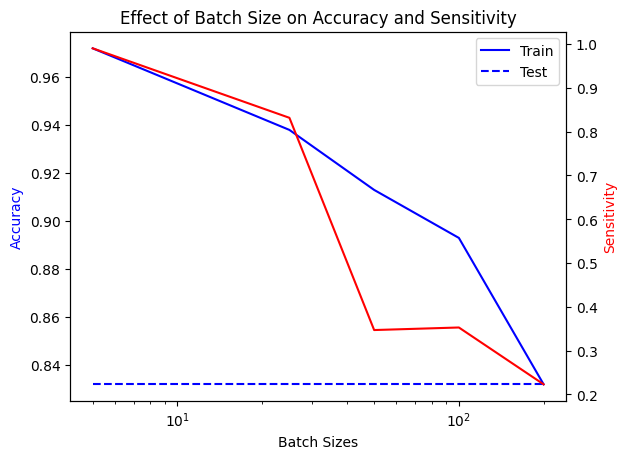

In [12]:
# Accuracy and Sensitivity by batch size of model
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(batchSizes, trainAccList, 'b', label='Train')
ax1.plot(batchSizes, testAccList, 'b--', label='Test')
ax2.plot(batchSizes, sensitivity_list, 'r', label='Sensitivity')
ax1.set_title('Effect of Batch Size on Accuracy and Sensitivity')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy', color='b')
ax2.set_ylabel('Sensitivity', color='r')
ax1.legend()

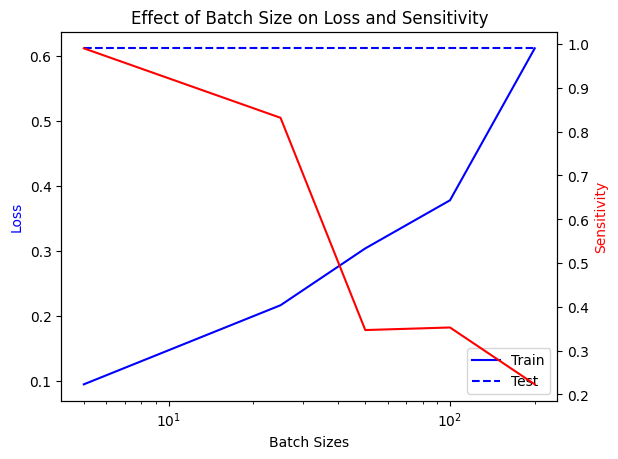

In [13]:
# Loss and Sensitivity by batch size of model
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(batchSizes, trainCostList, 'b', label='Train')
ax1.plot(batchSizes, testCostList, 'b--', label='Test')
ax2.plot(batchSizes, sensitivity_list, 'r', label='Sensitivity')
ax1.set_title('Effect of Batch Size on Loss and Sensitivity')
ax1.set_xlabel('Batch Sizes')
ax1.set_xscale('log')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Sensitivity', color='r')
ax1.legend()